<a href="https://colab.research.google.com/github/ajrianop/Estadistica_Descriptiva_y_Python_UD2023-3/blob/main/Parcial2_2024_04_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solución parcial 2**

**Primer punto.** Se están realizando pruebas de laboratorio para determinar la resistencia del suelo en diferentes puntos de un terreno donde se llevará a cabo un proyecto de construcción. Se han registrado los resultados de las pruebas en términos de la resistencia a la compresión del suelo en kilopascales (kPa): 230, 240, 225, 245, 255, 235, 250, 230, 240, 245, 245, 235, 235, 230, 230, 245, 230, 250, 220, 240.

*  Calcular la media, mediana, desviación estándar y el coeficiente  de variación.


In [ ]:
# Definimos las funciones media, mediana, desviación estándar y el coeficiente de variación

# Media
def arithmetic_mean(values : list):
  '''
  Función que permite calcular la media aritmética
  values --> list
  '''
  _sum = 0
  n = len(values)

  for value in values:
      _sum += value  # _sum = _sum + value

  return _sum / n

# Mediana
def median(values : list):
  values_sorted = values.copy()
  values_sorted.sort()
  n = len(values_sorted)
  if n % 2 == 1:
      mediana = values_sorted[n // 2]
  else:
      mediana = (values_sorted[(n - 1) // 2] + values_sorted[n // 2]) / 2
  return mediana

# Varianza Poblacional
def variance_p(datos):
    media = sum(datos) / len(datos)
    varianza = sum((x - media) ** 2 for x in datos) / (len(datos))
    return varianza

# Desviación Estandar
def standard_deviation_p(values : list):
  return variance_p(values) ** (1/2)

# Coeficiente de Variación
def coefficient_of_variation(values : list):
  '''
  Función de coeficientes de variación dados unos valores iniciales.
  Note que el resultado es un porcentaje.
  '''
  _mean = arithmetic_mean(values)
  _std = standard_deviation_p(values)

  return (_std  / _mean ) * 100

# Imprimir información de media, mediana, desviación estándar y el coeficiente de variación
def print_info(values : list, comentario : str):
  _dict = dict()
  ari_mean = arithmetic_mean(values)
  _median = median(values)
  _var = variance_p(values)
  _std = standard_deviation_p(values)
  coef_var = coefficient_of_variation(values)

  dict_measures = {"media" :ari_mean , "mediana" : _median , "varianza" : _var , "desviacion estandar" : _std, "coeficiente de variacion" : coef_var, "comentario" : comentario}
  for i in dict_measures:
    _dict[i] = dict_measures[i]

  return _dict

In [ ]:
# Dada la lista
_list = [230, 240, 225, 245, 255, 235, 250, 230, 240, 245, 245, 235, 235, 230, 230, 245, 230, 250, 220, 240]
print(f'Tenemos que la lista contiene {len(_list)} datos.')

Tenemos que la lista contiene 20 datos.


In [ ]:
values = _list
comentario = "Datos ejercicio 1, parte a)"
diccionario_solucion = print_info(values , comentario)
diccionario_solucion

{'media': 237.75,
 'mediana': 237.5,
 'varianza': 81.1875,
 'desviacion estandar': 9.01041064547005,
 'coeficiente de variacion': 3.789867779377518,
 'comentario': 'Datos ejercicio 1, parte a)'}

* Realice el gráfico de dispersión graficando en colores la media, mediana, e interpretar para que sirve la desviación estandar.

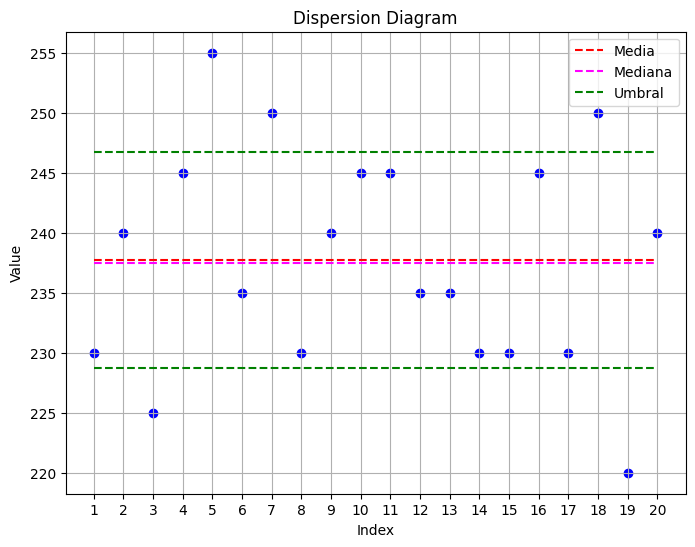

In [ ]:
import matplotlib.pyplot as plt
x_values = range(1, len(_list) + 1)

plt.figure(figsize=(8, 6))
plt.scatter(x_values, _list, color='blue')
plt.plot(x_values, [diccionario_solucion['media']] * len(_list), linestyle='--', color='red', label='Media')
plt.plot(x_values, [diccionario_solucion['mediana']] * len(_list), linestyle='--', color='magenta', label='Mediana')
plt.plot(x_values, [diccionario_solucion['media'] + diccionario_solucion['desviacion estandar']] * len(_list), linestyle='--', color='Green', label='Umbral')
plt.plot(x_values, [diccionario_solucion['media'] - diccionario_solucion['desviacion estandar']] * len(_list), linestyle='--', color='Green')
plt.title('Dispersion Diagram')
plt.xlabel('Index')
plt.ylabel('Value')
plt.xticks(x_values)
plt.legend()
plt.grid(True)
plt.show()

**Segundo punto.** Se está realizando un estudio hidrológico para evaluar el caudal de un río en diferentes momentos del año. Han recopilado datos de caudal del río en metros cúbicos por segundo (m³/s) durante un período de tiempo de 50 días consecutivos.

Los datos recopilados son los siguientes: 120, 130, 125, 140, 135, 128, 132, 129, 138, 142,
   125, 130, 135, 137, 128, 131, 134, 139, 145, 126, 132, 127, 136, 141, 130, 133, 135, 140, 129, 131, 133, 138, 143, 126, 128, 132, 137, 130, 134, 136, 141, 127, 129, 133, 139, 142, 127, 130, 135, 144

* Encuentre el rango de los datos, realice la tabla de frecuencias del problema dividiendo el intervalo de estudio en los intervalos $[120,124], (124,129],	(129,134],
   	(134,139], (139,144].$ Calcular la media, varianza  y desviación estándar utilizando la tabla calculada.

In [ ]:
import pandas as pd
import numpy as np

# Datos de las puntuaciones en el examen de matemáticas
caudales = [120, 130, 125, 140, 135, 128, 132, 129, 138, 142,
                125, 130, 135, 137, 128, 131, 134, 139, 145, 126,
                132, 127, 136, 141, 130, 133, 135, 140, 129, 131,
                133, 138, 143, 126, 128, 132, 137, 130, 134, 136,
                141, 127, 129, 133, 139, 142, 127, 130, 135, 144]

# Definir los límites de los intervalos
intervalos = [120, 124, 129, 134, 139, 145]

# Crear un DataFrame vacío para la tabla de distribución de frecuencias
tabla_frecuencias = pd.DataFrame(columns=['Intervalo de Puntuación', 'Marca de Clase', 'Frecuencia Absoluta'])

# Calcular la frecuencia absoluta para cada intervalo
_list = caudales
intervalos_str = []
marca_clase = []
counter_by_interval = []
for i in range(1, len(intervalos)):
  lower_bound = intervalos[i-1]
  upper_bound = intervalos[i]
  if i == 1:
    count = sum(lower_bound <= caudal <= upper_bound for caudal in caudales)
    intervalos_str.append(f"[{lower_bound },{upper_bound}]")
    marca_clase.append((lower_bound + upper_bound)/2)
    counter_by_interval.append(count)
  else:
    count = sum(lower_bound < caudal <= upper_bound for caudal in caudales)
    intervalos_str.append(f"({lower_bound },{upper_bound}]")
    marca_clase.append((lower_bound + upper_bound)/2)
    counter_by_interval.append(count)

# Agregar los datos al DataFrame
tabla_frecuencias['Intervalo de Puntuación'] = intervalos_str
tabla_frecuencias['Marca de Clase'] = marca_clase
tabla_frecuencias['Frecuencia Absoluta'] = counter_by_interval

# Calcular la frecuencia absoluta acumulada
tabla_frecuencias['Frecuencia Absoluta Acumulada'] = tabla_frecuencias['Frecuencia Absoluta'].cumsum()

# Calcular la frecuencia relativa
total_estudiantes = len(caudales)
tabla_frecuencias['Frecuencia Relativa'] = tabla_frecuencias['Frecuencia Absoluta'] / total_estudiantes * 100

# Calcular la frecuencia relativa acumulada
tabla_frecuencias['Frecuencia Relativa Acumulada'] = tabla_frecuencias['Frecuencia Relativa'].cumsum()

# Mostrar la tabla de distribución de frecuencias
tabla_frecuencias

,Intervalo de Puntuación,Marca de Clase,Frecuencia Absoluta,Frecuencia Absoluta Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada
0,"[120,124]",122.0,1,1,2.0,2.0
1,"(124,129]",126.5,13,14,26.0,28.0
2,"(129,134]",131.5,15,29,30.0,58.0
3,"(134,139]",136.5,12,41,24.0,82.0
4,"(139,145]",142.0,9,50,18.0,100.0


In [ ]:
tabla_frecuencias['Marca de Clase * Frecuencia Absoluta'] = (tabla_frecuencias['Marca de Clase'] * tabla_frecuencias['Frecuencia Absoluta'] )
tabla_frecuencias

media_agrupada = tabla_frecuencias['Marca de Clase * Frecuencia Absoluta'].sum() / tabla_frecuencias['Frecuencia Absoluta'].sum()
print(f'La media agrupada es {media_agrupada}')

tabla_frecuencias['(Marca de clase - Media Agrupada)**2'] =  (tabla_frecuencias['Marca de Clase']-media_agrupada) ** 2
tabla_frecuencias['Frecuencia Absoluta*(Marca de clase - Media Agrupada)**2'] =  tabla_frecuencias['Frecuencia Absoluta'] * (tabla_frecuencias['Marca de Clase']-media_agrupada) ** 2
varianza_agrupada = (tabla_frecuencias['(Marca de clase - Media Agrupada)**2'].sum() *tabla_frecuencias['Frecuencia Absoluta'].sum()) / (tabla_frecuencias['Frecuencia Absoluta'].sum() - 1)
print(f'La varianza es {varianza_agrupada}')
desviacion_estandar_agrupada = varianza_agrupada ** (0.5)
print(f'La desviacion estandar es {desviacion_estandar_agrupada}')

tabla_frecuencias


La media agrupada es 133.1
La varianza es 265.40816326530603
La desviacion estandar es 16.291352407498465


,Intervalo de Puntuación,Marca de Clase,Frecuencia Absoluta,Frecuencia Absoluta Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada,Marca de Clase * Frecuencia Absoluta,(Marca de clase - Media Agrupada)**2,Frecuencia Absoluta*(Marca de clase - Media Agrupada)**2
0,"[120,124]",122.0,1,1,2.0,2.0,122.0,123.21,123.21
1,"(124,129]",126.5,13,14,26.0,28.0,1644.5,43.56,566.28
2,"(129,134]",131.5,15,29,30.0,58.0,1972.5,2.56,38.40
3,"(134,139]",136.5,12,41,24.0,82.0,1638.0,11.56,138.72
4,"(139,145]",142.0,9,50,18.0,100.0,1278.0,79.21,712.89


* Calcular el valor mínimo los cuartiles $Q_1$, $Q_2$, $Q_3$ y el valor máximo. Utilizando las fórmulas dadas.

In [ ]:
import math

def quartiles(_list):
  _list.sort()
  _len = len(_list)
  if _len // 2 == 0:
    Q2 = (_list[_len / 2 -1] + _list[_len / 2]) / 2
    if _len // 4 == 0:
      Q1 = (_list[_len / 4 -1] + _list[_len / 4]) / 2
      Q3 = (_list[3*_len / 4 -1] + _list[3*_len / 4]) / 2
    else:
      Q1 = _list[math.ceil(_len / 4)]
      Q3 = _list[math.ceil(_len * 3 / 4)]
  else:
    Q1 = _list[math.ceil(_len / 4)]
    Q2 = _list[math.ceil(_len / 2)]
    Q3 = _list[math.ceil(_len * 3 / 4)]
  return {"minimo" : min(_list) , "cuartil 1" : Q1 , "cuartil 2" : Q2, "cuartil 3" : Q3 , "maximo" : max(_list)}

In [ ]:
print(f'Dada la lista {_list}')
print(f'La descripción de cuartiles es:')
quartiles(_list)

Dada la lista [120, 130, 125, 140, 135, 128, 132, 129, 138, 142, 125, 130, 135, 137, 128, 131, 134, 139, 145, 126, 132, 127, 136, 141, 130, 133, 135, 140, 129, 131, 133, 138, 143, 126, 128, 132, 137, 130, 134, 136, 141, 127, 129, 133, 139, 142, 127, 130, 135, 144]
La descripción de cuartiles es:


{'minimo': 120,
 'cuartil 1': 129,
 'cuartil 2': 133,
 'cuartil 3': 138,
 'maximo': 145}